In [1]:
import numpy as np
from specdb.specdb import SpecDB, IgmSpec
from astropy.io import fits

from funcs_query import query, pmf, identify

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [5]:
igmsp = SpecDB('/media/bartosz/USB STICK/BOSS_DR14/IGMspec_DB_v03.1.hdf5')
meta = igmsp['BOSS_DR14'].meta
meta[1]

Database is igmspec
Created on 2019-Mar-06
Version: v03.1


RA_GROUP,DEC_GROUP,THING_ID,PLATE,MJD,FIBERID,Z,Z_ERR,Z_VI,Z_PIPE,Z_PIPE_ERR,ZWARNING,Z_PCA,Z_PCA_ER,Z_MGII,BOSS_TARGET1,ANCILLARY_TARGET1,ANCILLARY_TARGET2,EBOSS_TARGET0,EBOSS_TARGET1,EBOSS_TARGET2,N_SPEC_SDSS,N_SPEC_BOSS,N_SPEC,PLATE_DUPLICATE,MJD_DUPLICATE,FIBERID_DUPLICATE,BI_CIV,ERR_BI_CIV,RUN_NUMBER,COL_NUMBER,FIELD_NUMBER,PSFFLUX,IVAR_PSFFLUX,PSFMAG,ERR_PSFMAG,MI,GAL_EXT,RASS_COUNTS,RASS_COUNTS_SNR,SDSS2ROSAT_SEP,FLUX_0.2_2.0keV,FLUX_0.2_2.0keV_ERR,FLUX_2.0_12.0keV,FLUX_2.0_12.0keV_ERR,FLUX_0.2_12.0keV,FLUX_0.2_12.0keV_ERR,LUM_0.2_12.0keV,SDSS2XMM_SEP,GALEX_MATCHED,FUV,FUV_IVAR,NUV,NUV_IVAR,JMAG,ERR_JMAG,JSNR,JRDFLAG,HMAG,ERR_HMAG,HSNR,HRDFLAG,KMAG,ERR_KMAG,KSNR,KRDFLAG,SDSS2MASS_SEP,W1MAG,ERR_W1MAG,W1SNR,W1CHI2,W2MAG,ERR_W2MAG,W2SNR,W2CHI2,W3MAG,ERR_W3MAG,W3SNR,W3CHI2,W4MAG,ERR_W4MAG,W4SNR,W4CHI2,SDSS2WISE_SEP,UKIDSS_MATCHED,YFLUX,YFLUX_ERR,JFLUX,JFLUX_ERR,HFLUX,HFLUX_ERR,KFLUX,KFLUX_ERR,FIRST_MATCHED,FIRST_FLUX,FIRST_SNR,SDSS2FIRST_SEP,ORIG_ID,R,zem_GROUP,sig_zem,IGM_ID,NPIX,WV_MIN,WV_MAX,GROUP_ID,EPOCH,SDSS_NAME,SPECTRO,SOURCE_Z,SPECTRO_DUPLICATE,RERUN_NUMBER,OBJ_ID,CC_FLAGS,PH_FLAGS,flag_zem,CAT,DATE-OBS,INSTR,DISPERSER,TELESCOPE,STYPE,SPEC_FILE
float64,float64,int32,int16,int32,int16,float64,float64,float64,float64,float64,int16,float64,float64,float64,int64,int64,int64,int64,int64,int64,int16,int16,int16,int32[51],int32[51],int32[51],float64,float64,int16,int16,int16,float64[5],float64[5],float64[5],float64[5],float64,float64[5],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float32,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,int64,float64,float64,float64,int64,int64,float64,float64,int64,float64,str18,str4,str4,str1[51],str1,str1,str4,str4,str4,str4,str10,str4,str4,str10,str3,str26
0.00238,5.94190,163544156,8740,57367,694,2.1031202999999996,0.0,-1.0,2.1031203269958496,0.0009241577354259787,0,2.0996384999999997,2.0983490000000002,2.0983490000000002,0,0,0,0,2048,0,0,0,0,-1 .. -1,-1 .. -1,-1 .. -1,0.0,0.0,0,0,0,1.1197296380996704 .. 4.730101585388184,9.196866035461426 .. 0.8192309737205505,22.360628128051758 .. 20.78717613220215,0.3101848363876343 .. 0.2420300394296646,-24.732,0.2338263988494873 .. 0.06966802477836609,0.0,0.0,-1.0,nan,nan,nan,nan,nan,nan,nan,nan,1.0,0.0,0.0,0.0,0.0,nan,nan,nan,-1,nan,nan,nan,-1,nan,nan,nan,-1,nan,16.969,0.127,8.5,0.9904,16.887999999999998,0.409,2.700000047683716,1.004,11.861,nan,1.399999976158142,0.9819,8.604,0.127,0.699999988079071,0.9478,0.706171,1.0,1.2885136657753169e-31,2.4790984841010035e-32,1.229889058862803e-31,4.504542253745802e-32,1.496424644649041e-31,4.7290496259357616e-32,2.4598190249290145e-31,5.689571920868372e-32,0,-1.0,-1.0,-1.0,1,2100.0,2.103,0.0009241577354259787,1,4582,3619.9,10394.4,1,2000.0,000000.57+055630.8,BOSS,AUTO,- .. -,-,-,hH00,BCUU,AUTO,DR14,2015-12-11,BOSS,BOTH,SDSS 2.5-M,QSO,spec-8740-57367-0694.fits


In [6]:
fpath = '/media/bartosz/USB STICK/dr16q_prop_May16_2023.fits'

# Open the .fits file
with fits.open(fpath) as hdul:
    # Print information about the file
    hdul.info()

    # Access the data from the primary HDU (header/data unit)
    data1 = hdul[1].data

    # Optionally, you can also access the header
    header1 = hdul[1].header
    print(header1)

Filename: /media/bartosz/USB STICK/dr16q_prop_May16_2023.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    236   750414R x 114C   [18A, K, K, K, D, D, 20A, 10A, D, 12A, D, D, D, D, D, 5D, 5D, 2D, 3D, 3D, D, D, 3D, 3D, D, D, D, D, D, D, D, D, D, D, D, D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 6D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, 2D, D, D, D, D, D, D, D, D, D, D, D, D, 8D, 8D]   
  2                1 BinTableHDU    188   750414R x 90C   [5D, 5D, 5D, E, D, D, D, D, D, D, D, D, J, J, J, 5E, 5D, 5E, 5D, 5E, D, D, I, D, D, D, D, I, D, D, D, D, D, D, D, D, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, I, I, D, D, D, D, D, D, J, D, D, D, J, D, D, D, J, D, 21A, D, D, E, E, D, K, D, D, E, E, E, E, E, E, E, D] 

In [7]:
NN_file = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_full_sc.txt', dtype='str')
hmeta = np.loadtxt('/media/bartosz/USB STICK/highz_data/meta_data_v2.txt', dtype='str')
z_meta = [float(z) for z in hmeta[:,1]]
snr_meta = [float(s) for s in hmeta[:,2]]

NAMES = NN_file[:,0]
HNAME, HZ, HSNR, NNID, NND = [], [], [], [], []
SDSSNAME, Z_SYS, MBH_CIV, MBH_CIV_ERR, MBH_MGII, MBH_MGII_ERR, MBH_HB, MBH_HB_ERR = [], [], [], [], [], [], [], []
for j, n in enumerate(NAMES):
    hz = z_meta[j]
    hsnr = snr_meta[j]
    qlist = [int(o) for o in NN_file[:,1:6][j]]
    ndist = [float(d) for d in NN_file[:,6:][j]]
    for i,q in enumerate(qlist):
        wu_id = query(meta,data1,q)
        if type(wu_id) == np.int64:
            sdssname = data1[wu_id]['SDSS_NAME']
            z_sys = data1[wu_id]['Z_SYS']
            mbh_civ = data1[wu_id]['LOGMBH_CIV']
            mbh_civ_err = data1[wu_id]['LOGMBH_CIV_ERR']
            mbh_mgii = data1[wu_id]['LOGMBH_MGII']
            mbh_mgii_err = data1[wu_id]['LOGMBH_MGII_ERR']
            mbh_hb = data1[wu_id]['LOGMBH_HB']
            mbh_hb_err = data1[wu_id]['LOGMBH_HB_ERR']
        # elif type(wu_id) == np.ndarray:
        #     mbh = [data1[m]['LOGMBH_CIV'] for m in wu_id]
        elif wu_id == None:
            sdssname = '-'
            z_sys = 0
            mbh_civ = 0
            mbh_civ_err = 0
            mbh_mgii = 0
            mbh_mgii_err = 0
            mbh_hb = 0
            mbh_hb_err = 0
        HNAME.append(n)
        HZ.append(hz)
        HSNR.append(hsnr)
        NNID.append(q)
        NND.append(ndist[i])
        SDSSNAME.append(sdssname)
        Z_SYS.append(z_sys)
        MBH_CIV.append(mbh_civ)
        MBH_CIV_ERR.append(mbh_civ_err)
        MBH_MGII.append(mbh_mgii)
        MBH_MGII_ERR.append(mbh_mgii_err)
        MBH_HB.append(mbh_hb)
        MBH_HB_ERR.append(mbh_hb_err)

Could not find object for given coordinates.
Could not find object for given coordinates.
Could not find object for given coordinates.
Could not find object for given coordinates.
Could not find object for given coordinates.
Could not find object for given coordinates.
Could not find object for given coordinates.


In [8]:
errors_csv = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - Sheet2.csv',delimiter=',')
errors_plus = errors_csv[:,0]
errors_minus = errors_csv[:,1]
HNAME

['ATLASJ025.6821-33.4627',
 'ATLASJ025.6821-33.4627',
 'ATLASJ025.6821-33.4627',
 'ATLASJ025.6821-33.4627',
 'ATLASJ025.6821-33.4627',
 'CFHQSJ1509-1749',
 'CFHQSJ1509-1749',
 'CFHQSJ1509-1749',
 'CFHQSJ1509-1749',
 'CFHQSJ1509-1749',
 'PSOJ036+03',
 'PSOJ036+03',
 'PSOJ036+03',
 'PSOJ036+03',
 'PSOJ036+03',
 'SDSSJ0100+2802',
 'SDSSJ0100+2802',
 'SDSSJ0100+2802',
 'SDSSJ0100+2802',
 'SDSSJ0100+2802',
 'SDSSJ0818+1722',
 'SDSSJ0818+1722',
 'SDSSJ0818+1722',
 'SDSSJ0818+1722',
 'SDSSJ0818+1722',
 'SDSSJ0836+0054',
 'SDSSJ0836+0054',
 'SDSSJ0836+0054',
 'SDSSJ0836+0054',
 'SDSSJ0836+0054',
 'SDSSJ0927+2001',
 'SDSSJ0927+2001',
 'SDSSJ0927+2001',
 'SDSSJ0927+2001',
 'SDSSJ0927+2001',
 'SDSSJ1030+0524',
 'SDSSJ1030+0524',
 'SDSSJ1030+0524',
 'SDSSJ1030+0524',
 'SDSSJ1030+0524',
 'SDSSJ1306+0356',
 'SDSSJ1306+0356',
 'SDSSJ1306+0356',
 'SDSSJ1306+0356',
 'SDSSJ1306+0356',
 'ULASJ0148+0600',
 'ULASJ0148+0600',
 'ULASJ0148+0600',
 'ULASJ0148+0600',
 'ULASJ0148+0600',
 'ULASJ1319+0950',
 'ULAS

In [11]:
HMBH_MGII = [9.37,9.3,9.43,10.09,9.76,9.59,9.11,9.27,9.29,9.58,9.53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.18,9.51,9.09,9,9.41,9.34,9.02,9.19,9.31,9.34,8.92,9.22,9.8,9.2]
HMBH_CIV = [9.51,9.47,9.55,9.82,9.55,10.15,9.28,9.45,9.5,9.23,9.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.5,9.61,9.74,9.23,9.29,9.45,9.54,9.29,9.52,9.58,9.26,9.24,9.23,9.39]

HMBH, PLUS, MINUS = [], [], []
for j, n in enumerate(NAMES):
    qlist = [int(o) for o in NN_file[:,1:6][j]]
    for i,q in enumerate(qlist):
        HMBH.append(HMBH_CIV[j])
        PLUS.append(errors_plus[j])
        MINUS.append(errors_minus[j])

col1 = fits.Column(name='NAME', format='22A', array=HNAME)
col2 = fits.Column(name='Z', format='D', array=HZ)
col3 = fits.Column(name='SNR', format='D', array=HSNR)
col31 = fits.Column(name='MBH_CIV_XS', format='D', array=HMBH)
col32 = fits.Column(name='MBH_CIV_XS_plus', format='D', array=PLUS)
col33 = fits.Column(name='MBH_CIV_XS_minus', format='D', array=MINUS)
col4 = fits.Column(name='NN_ID', format='K', array=NNID)
col5 = fits.Column(name='NN_D', format='D', array=NND)
col6 = fits.Column(name='SDSS_NAME', format='18A', array=SDSSNAME)
col7 = fits.Column(name='Z_SYS', format='D', array=Z_SYS)
col8 = fits.Column(name='MBH_CIV', format='D', array=MBH_CIV)
col9 = fits.Column(name='MBH_CIV_ERR', format='D', array=MBH_CIV_ERR)
col10 = fits.Column(name='MBH_MGII', format='D', array=MBH_MGII)
col11 = fits.Column(name='MBH_MGII_ERR', format='D', array=MBH_MGII_ERR)
col12 = fits.Column(name='MBH_HB', format='D', array=MBH_HB)
col13 = fits.Column(name='MBH_HB_ERR', format='D', array=MBH_HB_ERR)

cols = fits.ColDefs([col1, col2, col3, col31, col32, col33, col4, col5, col6, col7, col8, col9, col10, col11, col12, col13])

hdu = fits.BinTableHDU.from_columns(cols)

hdu.writeto('/media/bartosz/USB STICK/highz_data/nn_properties.fits')#, overwrite=True)

In [12]:
with fits.open('/media/bartosz/USB STICK/highz_data/nn_properties.fits') as hdul:
    hdul.info()
    header = hdul[1].header
    print(header)
    data = hdul[1].data

print(data['MBH_CIV_XS_minus'])

Filename: /media/bartosz/USB STICK/highz_data/nn_properties.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     40   200R x 16C   [22A, D, D, D, D, D, K, D, 18A, D, D, D, D, D, D, D]   
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  152 / length of dimension 1                          NAXIS2  =                  200 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                   16 / number of table fields                         TTYPE1  = 'NAME    '                                                   

/tmp/ipykernel_5026/1106707689.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],d['MBH_CIV']-d['MBH_CIV_XS'], c=colors[k], marker=marker)#,alpha=alpha)#,'ro')


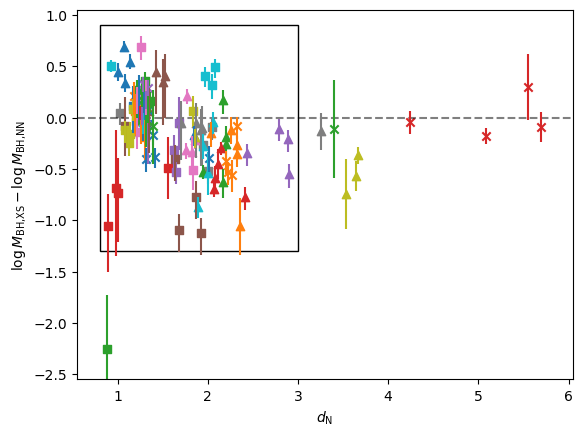

In [35]:
mask = data['MBH_CIV_XS'] != 0
data1 = data[mask]
cmap = plt.get_cmap('tab10')

colors = cmap(range(10))
#markers = ['o']*10 + ['s']*10 + ['^']*10 + ['x']*10 # + ['*']*5
markers = ['o', 's', '^', 'x', '*']
alphas = [1,0.9,0.7,0.6,0.5]
j=0
k=0
l=0

fig = plt.figure()
plt.axhline(0,c='black',ls='--',alpha=0.5)
someX, someY = 2, 5
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0.8,-1.3), 2.2, 2.2, facecolor="white", edgecolor='black'))
for i, d in enumerate(data1):
    marker=markers[j]
    alpha=alphas[l]
    l+=1
    #print(d['MBH_CIV_ERR'])
    plus = np.sqrt(d['MBH_CIV_ERR']**2+d['MBH_CIV_XS_plus']**2)
    minus = np.sqrt(d['MBH_CIV_ERR']**2+d['MBH_CIV_XS_minus']**2)
    plt.scatter(d['NN_D'],d['MBH_CIV']-d['MBH_CIV_XS'], c=colors[k], marker=marker)#,alpha=alpha)#,'ro')
    plt.errorbar(d['NN_D'],d['MBH_CIV']-d['MBH_CIV_XS'], yerr=[[minus],[plus]], c=colors[k])#, fmt='o', capsize=5, label='Error Bars')
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0

#plt.scatter(data1['NN_D'],data1['MBH_CIV']/data1['MBH'], c=colors, marker=markers)#,'ro')
#plt.ylim(0.7,1.2)
plt.ylim(-2.55,1.05)
plt.xlim(0.55,6.05)
#plt.plot([0,10],[0,10],ls='-')
plt.ylabel(r'$\log M_\text{BH,XS} - \log M_\text{BH,NN}$')
plt.xlabel(r'$d_\text{N}$')
plt.savefig('plots/MBH_dN.png', format='png')
plt.show()
plt.close()

/tmp/ipykernel_5026/2811755612.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(d['NN_D'],d['MBH_CIV']-d['MBH_CIV_XS'], c=colors[k], marker=marker, alpha=0.8)#,alpha=alpha)#,'ro')


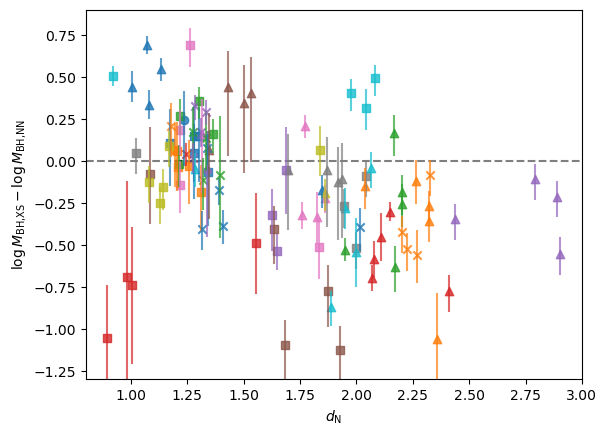

In [36]:
j=0
k=0
l=0
fig = plt.figure()
plt.axhline(0,c='black',ls='--',alpha=0.5)
for i, d in enumerate(data1):
    marker=markers[j]
    alpha=alphas[l]
    l+=1
    plus = np.sqrt(d['MBH_CIV_ERR']**2+d['MBH_CIV_XS_plus']**2)
    minus = np.sqrt(d['MBH_CIV_ERR']**2+d['MBH_CIV_XS_minus']**2)
    plt.scatter(d['NN_D'],d['MBH_CIV']-d['MBH_CIV_XS'], c=colors[k], marker=marker, alpha=0.8)#,alpha=alpha)#,'ro')
    plt.errorbar(d['NN_D'],d['MBH_CIV']-d['MBH_CIV_XS'], yerr=[[minus],[plus]], c=colors[k],alpha=0.7)
    if i % 5 == 0:
        k+=1
        l=0
    if i % 50 == 0:        
        j+=1
        k=0
        
plt.ylim(-1.3,0.9)
plt.xlim(0.8,3)
# plt.xlim(1,1.5)
# plt.ylim(-0.5,0.5)
plt.ylabel(r'$\log M_\text{BH,XS} - \log M_\text{BH,NN}$')
plt.xlabel(r'$d_\text{N}$')
plt.savefig('plots/MBH_dN_zoom.png', format='png')
plt.show()

In [38]:
data['MBH_CIV']

array([ 9.75269596,  9.55689333,  9.66007127,  9.6580474 ,  9.44303332,
        9.57745966,  9.53567394,  9.52619113,  9.43829078,  9.28322385,
        9.51401133,  9.52951774,  9.81946676,  9.90449106,  9.70879518,
        7.56638646,  8.76725916,  0.        ,  9.13175284,  9.08380218,
        9.06114725,  0.        ,  0.        ,  9.01559653,  9.49684909,
        9.82997083,  9.74180385,  9.05540394,  9.37787616,  9.02304537,
        9.19979704,  9.46135501,  9.13574669,  0.        ,  9.96915502,
        8.93806873,  9.17951008,  8.93027529,  0.        ,  9.35860519,
        9.54598923,  9.37376289,  9.25142649,  9.34195897,  9.58663327,
        9.29603613,  9.6323115 ,  9.54232089,  9.72100341,  0.        ,
        9.78524522,  9.72295322,  9.96915502,  9.61466875,  9.82520137,
        9.55129733,  9.82520137,  9.32409595,  9.52951774,  9.70879518,
        9.57204245,  9.75628387,  9.19069452,  9.30047668,  9.69270956,
        8.96826272,  9.63153745,  9.66732584,  9.1033387 ,  9.16